# TA-11 — Implementasi ANN untuk Deteksi Penipuan Transaksi (Fraud)
**Dataset:** `creditcard.csv` (Kaggle Credit Card Fraud)  
**Target:** `Class` (0 = normal, 1 = fraud)  
**Fitur yang dipakai (sesuai desain TP-11: 3 neuron input):** `Time`, `Amount`, `V14`  
**Arsitektur (sesuai TP-11):** Input(3) → Dense(5, ReLU) → Dense(1, Sigmoid)

> Catatan: dataset ini *imbalanced* (fraud sangat sedikit), jadi evaluasi jangan hanya akurasi.


In [ ]:
# (Opsional) Jalankan jika library belum terpasang
# !pip install pandas numpy scikit-learn matplotlib joblib


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

import joblib


In [10]:
# 1) Load Data
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# EDA singkat
print("Shape:", df.shape)
print("\nKolom:", df.columns.tolist())

print("\nCek missing values (NaN) per kolom:")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\nDistribusi target (Class):")
print(df["Class"].value_counts())


Shape: (284807, 31)

Kolom: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Cek missing values (NaN) per kolom:
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

Distribusi target (Class):
Class
0    284315
1       492
Name: count, dtype: int64


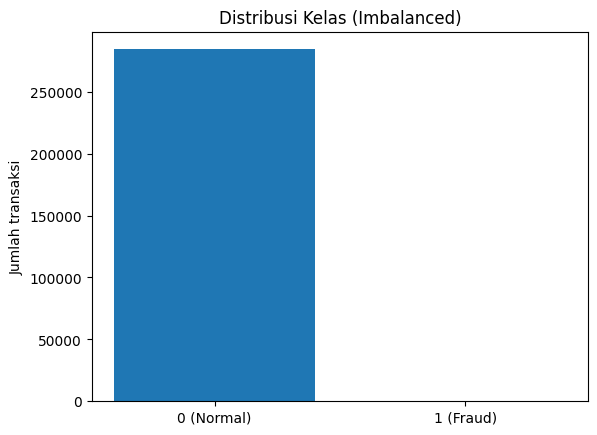

In [12]:
# Visualisasi jumlah kelas (imbalanced)
counts = df["Class"].value_counts().sort_index()
plt.figure()
plt.bar(["0 (Normal)", "1 (Fraud)"], counts.values)
plt.title("Distribusi Kelas (Imbalanced)")
plt.ylabel("Jumlah transaksi")
plt.show()


## 2) Preprocessing (Encoding & Scaling)
- Dataset ini sudah numerik (tidak butuh encoding kategori).
- Kita pakai 3 fitur saja agar konsisten dengan desain TP-11 (Input Layer = 3 neuron).
- Scaling **WAJIB** untuk ANN (sesuai modul).

In [13]:
# Pilih 3 fitur sesuai TP-11
FEATURES = ["Time", "Amount", "V14"]
TARGET = "Class"

X = df[FEATURES].copy()
y = df[TARGET].copy()

# Split train/test (stratify penting karena data tidak seimbang)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape :", X_test_scaled.shape)


Train shape: (227845, 3)
Test shape : (56962, 3)


## 3) Definisi Model (Arsitektur)
Sesuai rancangan TP-11:
- **Input:** 3 fitur  
- **Hidden Layer:** 1 layer, 5 neuron, aktivasi ReLU  
- **Output:** 1 neuron, aktivasi Sigmoid (klasifikasi biner)

Menggunakan `MLPClassifier` dari scikit-learn untuk konsistensi dengan deployment.

In [14]:
# Set random seed untuk reproducibility
np.random.seed(42)

# Model ANN sesuai desain TP-11 menggunakan MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(5,),   # 1 hidden layer dengan 5 neuron
    activation="relu",          # aktivasi ReLU untuk hidden layer
    solver="adam",              # optimizer adam
    max_iter=50,                # maksimum 50 iterasi
    random_state=42,
    verbose=True                # tampilkan progress training
)

print("Model Architecture:")
print(f"- Input Layer: 3 neurons (Time, Amount, V14)")
print(f"- Hidden Layer: 1 layer dengan 5 neurons (ReLU activation)")
print(f"- Output Layer: 1 neuron (Sigmoid activation untuk binary classification)")
print(f"\nModel parameters akan ditampilkan saat training...")


Model Architecture:
- Input Layer: 3 neurons (Time, Amount, V14)
- Hidden Layer: 1 layer dengan 5 neurons (ReLU activation)
- Output Layer: 1 neuron (Sigmoid activation untuk binary classification)

Model parameters akan ditampilkan saat training...


## 4) Training Process
Training model dengan data yang sudah di-scale. MLPClassifier memiliki built-in validation.

In [15]:
# Training model
print("Memulai training...")
model.fit(X_train_scaled, y_train)

print("\nTraining selesai!")
print(f"Jumlah iterasi yang digunakan: {model.n_iter_}")
print(f"Loss akhir: {model.loss_:.4f}")


Memulai training...
Iteration 1, loss = 0.25319432
Iteration 2, loss = 0.02664990
Iteration 3, loss = 0.00855446
Iteration 4, loss = 0.00560580
Iteration 5, loss = 0.00515776
Iteration 6, loss = 0.00501308
Iteration 7, loss = 0.00493802
Iteration 8, loss = 0.00487366
Iteration 9, loss = 0.00480674
Iteration 10, loss = 0.00478130
Iteration 11, loss = 0.00476022
Iteration 12, loss = 0.00473026
Iteration 13, loss = 0.00471458
Iteration 14, loss = 0.00470223
Iteration 15, loss = 0.00468940
Iteration 16, loss = 0.00468568
Iteration 17, loss = 0.00467582
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Training selesai!
Jumlah iterasi yang digunakan: 17
Loss akhir: 0.0047


## 5) Evaluasi Training
MLPClassifier menyimpan loss curve di `model.loss_curve_` (jika available).

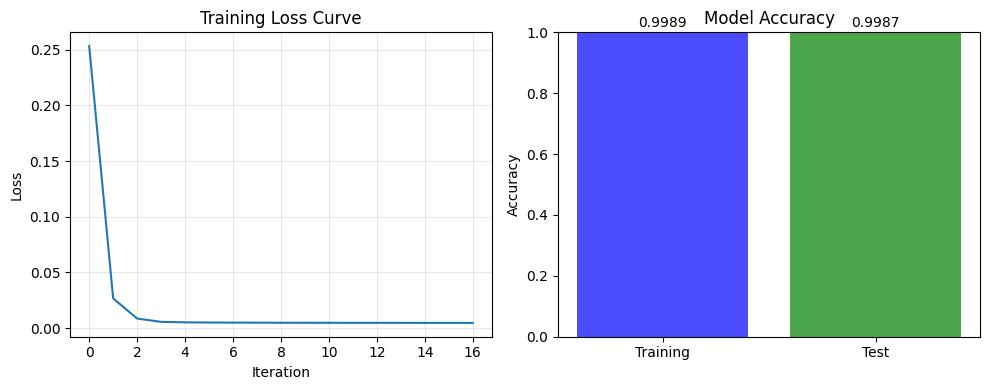

In [16]:
# Visualisasi loss curve jika tersedia
if hasattr(model, 'loss_curve_') and model.loss_curve_ is not None:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(model.loss_curve_)
    plt.title("Training Loss Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True, alpha=0.3)
    
    # Evaluasi pada training set untuk melihat akurasi
    train_pred = model.predict(X_train_scaled)
    train_acc = (train_pred == y_train).mean()
    test_pred = model.predict(X_test_scaled)
    test_acc = (test_pred == y_test).mean()
    
    plt.subplot(1, 2, 2)
    plt.bar(["Training", "Test"], [train_acc, test_acc], color=['blue', 'green'], alpha=0.7)
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    for i, v in enumerate([train_acc, test_acc]):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("Loss curve tidak tersedia untuk model ini.")
    print("Evaluasi langsung dilakukan pada test set.")


## 6) Evaluasi Akhir (Test Set)
Karena data imbalanced, perhatikan **recall** untuk kelas fraud (1).

In [17]:
# Prediksi pada test set
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilitas class 1 (fraud)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)
print(cm)
print("\nKeterangan:")
print("  TN (True Negative)  : Normal diprediksi Normal")
print("  FP (False Positive) : Normal diprediksi Fraud")
print("  FN (False Negative) : Fraud diprediksi Normal  ⚠️ (Berbahaya!)")
print("  TP (True Positive)  : Fraud diprediksi Fraud")

# Classification Report
print("\n" + "=" * 50)
print("CLASSIFICATION REPORT")
print("=" * 50)
print(classification_report(y_test, y_pred, digits=4, target_names=["Normal", "Fraud"]))


CONFUSION MATRIX
[[56840    24]
 [   50    48]]

Keterangan:
  TN (True Negative)  : Normal diprediksi Normal
  FP (False Positive) : Normal diprediksi Fraud
  FN (False Negative) : Fraud diprediksi Normal  ⚠️ (Berbahaya!)
  TP (True Positive)  : Fraud diprediksi Fraud

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal     0.9991    0.9996    0.9993     56864
       Fraud     0.6667    0.4898    0.5647        98

    accuracy                         0.9987     56962
   macro avg     0.8329    0.7447    0.7820     56962
weighted avg     0.9985    0.9987    0.9986     56962



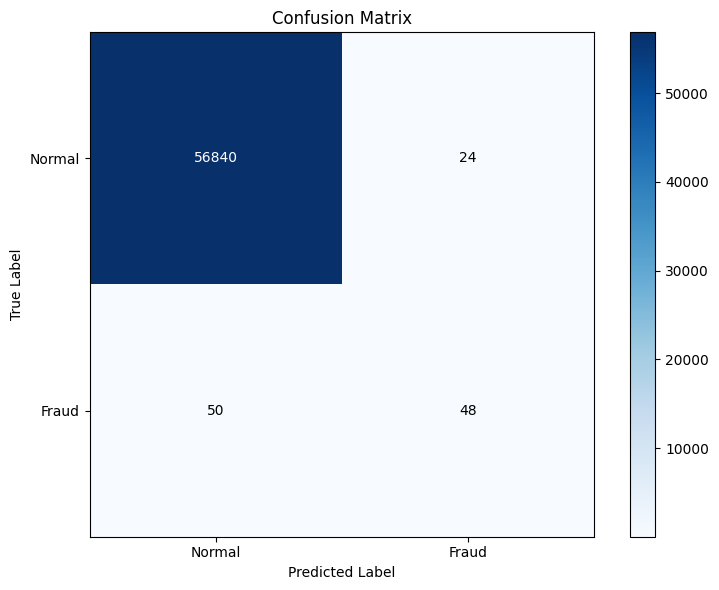


📊 Detail Confusion Matrix:
  True Negative (TN)  : 56,840 - Normal diprediksi Normal
  False Positive (FP) : 24 - Normal diprediksi Fraud (Type I Error)
  False Negative (FN) : 50 - Fraud diprediksi Normal (Type II Error) ⚠️
  True Positive (TP)  : 48 - Fraud diprediksi Fraud

📈 Metrics:
  Accuracy  : 0.9987
  Precision : 0.6667
  Recall    : 0.4898
  F1-Score  : 0.5647


In [18]:
# Visualisasi confusion matrix yang lebih informatif
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Label dan title
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=["Normal", "Fraud"],
       yticklabels=["Normal", "Fraud"],
       title="Confusion Matrix",
       ylabel="True Label",
       xlabel="Predicted Label")

# Tambahkan text di setiap cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Tambahkan informasi tambahan
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 Detail Confusion Matrix:")
print(f"  True Negative (TN)  : {tn:,} - Normal diprediksi Normal")
print(f"  False Positive (FP) : {fp:,} - Normal diprediksi Fraud (Type I Error)")
print(f"  False Negative (FN) : {fn:,} - Fraud diprediksi Normal (Type II Error) ⚠️")
print(f"  True Positive (TP)  : {tp:,} - Fraud diprediksi Fraud")
print(f"\n📈 Metrics:")
print(f"  Accuracy  : {(tn + tp) / (tn + fp + fn + tp):.4f}")
print(f"  Precision : {tp / (tp + fp):.4f}" if (tp + fp) > 0 else "  Precision : N/A")
print(f"  Recall    : {tp / (tp + fn):.4f}" if (tp + fn) > 0 else "  Recall    : N/A")
print(f"  F1-Score  : {2 * tp / (2 * tp + fp + fn):.4f}" if (2 * tp + fp + fn) > 0 else "  F1-Score  : N/A")


## (Opsional) Simpan Model & Scaler
Agar bisa dipakai untuk deployment (misalnya di aplikasi Flask).

In [ ]:
# Simpan scaler dan model menggunakan joblib (kompatibel dengan app.py)
joblib.dump(scaler, "scaler.joblib")
joblib.dump(model, "model.joblib")

print("=" * 50)
print("MODEL DAN SCALER BERHASIL DISIMPAN")
print("=" * 50)
print("✓ scaler.joblib")
print("✓ model.joblib")
print("\nFile-file ini dapat digunakan untuk deployment di Flask app.")


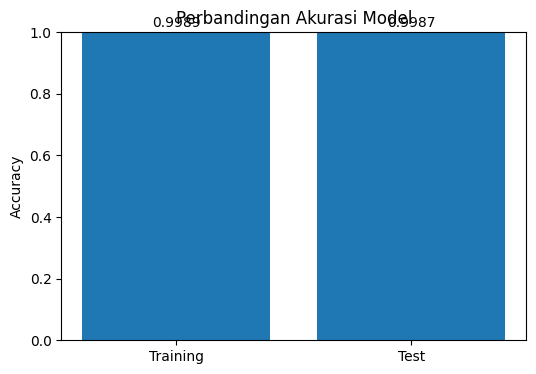

Training Accuracy: 0.998915929689043
Test Accuracy: 0.9987008883115059


In [20]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

acc_train = accuracy_score(y_train, model.predict(X_train_scaled))
acc_test = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6,4))
bars = plt.bar(["Training", "Test"], [acc_train, acc_test])
plt.ylim(0, 1)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{yval:.4f}", ha='center', va='bottom')

plt.show()

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

